## Weekly activity
1. Create a **random noise color and grayscale** image. You can set your own width and height, but keep the total number of pixels of both images identical.
2. Convert the code chunk found under section <a href="#Section1">Divide an image into smaller patches using cropping</a> into a function with the following signature:
```python
crop_grid(img, num_horizontal_grid, num_vertical_grid, line_color)
 # img is the source image
 # num_horizontal_grid and num_vertical_grid are the number of patches along x and y axes.
 # line_color is the color of the grid line.
 # The output of the function should be image with grids
```
3. How would you *change the brightness* of a **color image**? Suggest **two ways** to perform the image processing operations. Implement your methods by providing the example codes. You are free to choose any image.
4. Provide at least one common use cases for the following color spaces:
    - RGB
    - HSV
    - CIELAB

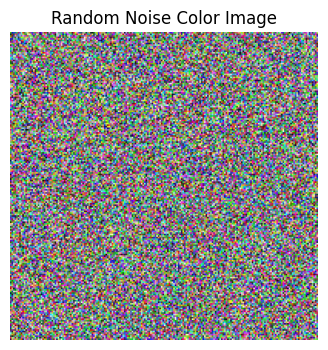

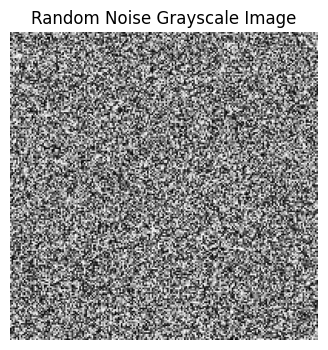

In [31]:
# Exercise 1

import numpy as np
import matplotlib.pyplot as plt

width = 200
height = 200

noise_color = np.random.randint(0, 256, (height, width, 3), dtype=np.uint8) 

noise_gray = np.random.randint(0, 256, (height, width), dtype=np.uint8)

plt.figure(figsize=(4, 4))
plt.imshow(noise_color)
plt.title("Random Noise Color Image")
plt.axis("off")
plt.show()

plt.figure(figsize=(4, 4))
plt.imshow(noise_gray, cmap="gray")
plt.title("Random Noise Grayscale Image")
plt.axis('off')
plt.show()

In [13]:
# Exercise 2

import cv2 as cv
import numpy as np

def crop_grid(img, num_horizontal_grid, num_vertical_grid, line_color=(0, 255, 0)):
    img = cv.imread("images/dog.jfif")
    img_copy = img.copy()
    height, width = img.shape[:2]
    
    # Calculate dimensions of each grid cell
    M = height // num_vertical_grid
    N = width // num_horizontal_grid
    
    # Draw rectangles around each grid cell
    for y in range(0, height, M):
        for x in range(0, width, N):
            y1 = y + M
            x1 = x + N
            
            # Adjust for edges of the image
            if x1 >= width and y1 >= height:
                x1 = width - 1
                y1 = height - 1
                cv.rectangle(img_copy, (x, y), (x1, y1), line_color, 1)
                
            elif y1 >= height:
                y1 = height - 1
                cv.rectangle(img_copy, (x, y), (x1, y1), line_color, 1)
                
            elif x1 >= width:
                x1 = width - 1
                cv.rectangle(img_copy, (x, y), (x1, y1), line_color, 1)
                
            else:
                cv.rectangle(img_copy, (x, y), (x1, y1), line_color, 1)
    
    return img_copy

# Example usage:
img = cv.imread('images/dog.jfif')

# Specify number of grid divisions
num_horizontal_grid = 3
num_vertical_grid = 2

# Color for grid lines (BGR format)
line_color = (0, 255, 0)

# Apply the function
grid_img = crop_grid(img, num_horizontal_grid, num_vertical_grid, line_color)

# Display the result
cv.imshow('Grid Image', grid_img)
cv.waitKey(0)
cv.destroyAllWindows()

In [41]:
# Exercise 3
from utils import display_images

In [47]:
# Exercise 3
# 1st way: Use point operators
def point_op(img, alpha, beta):
    """"""""""""""
    img = img.astype("float32")
    res = alpha * img + beta
    res = np.clip(res, 0, 255)
    return np.uint8(res)

img = cv.imread("images/camera.jpg")
# enhance contrast and brightness, alpha > 1, beta > 0
alpha = 1.2
beta = 10
dst = point_op(img, alpha, beta)

display_images([img, dst], ("original", "enhanced"))

In [48]:
# Exercise 3
# 2nd way: Use HSV

import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load a color image
img = cv.imread("images/camera.jpg")

# Method 1: Directly adjust pixel values
def adjust_brightness_direct(image, factor):
    # Convert to float to handle values outside [0, 255]
    image = image.astype(np.float32)
    
    # Scale pixel values
    image = image * factor
    
    # Clip values to stay within [0, 255]
    image = np.clip(image, 0, 255)
    
    # Convert back to uint8
    image = image.astype(np.uint8)
    
    return image

# Adjust brightness by scaling pixel values
brightened_img = adjust_brightness_direct(img, 1.5)  # Increase brightness by 50%

display_images([img, brightened_img], ("original", "enhanced"))


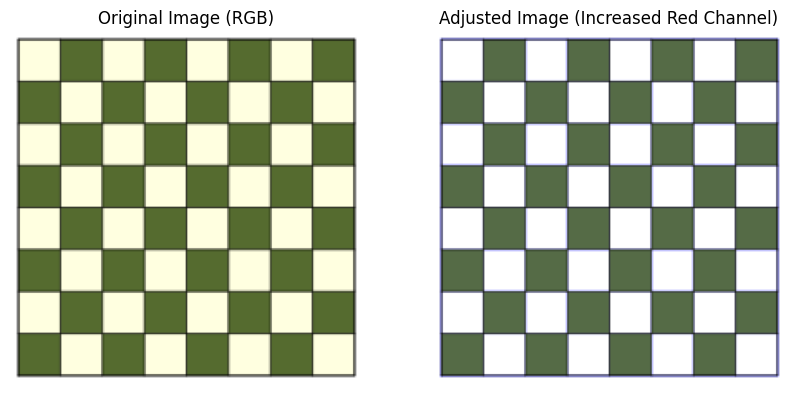

In [52]:
# Exercise 4
# RGB: color manipulation

import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load an image in RGB format
img = cv2.imread("images/chessboard.png", cv2.IMREAD_COLOR)

# Splitting RGB channels
r, g, b = cv2.split(img)

# Example: Increase the red channel intensity
r_adjusted = np.clip(r * 1.5, 0, 255).astype(np.uint8)

# Merge the channels back into a BGR image
img_adjusted = cv2.merge((r_adjusted, g, b))

# Display original and adjusted images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image (RGB)')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(img_adjusted, cv2.COLOR_BGR2RGB))
plt.title('Adjusted Image (Increased Red Channel)')
plt.axis('off')

plt.show()

#display_images([img, img_adjusted], ("Original Image (RGB)", 
#                                     "Adjusted Image (Increased Red Channel)"))


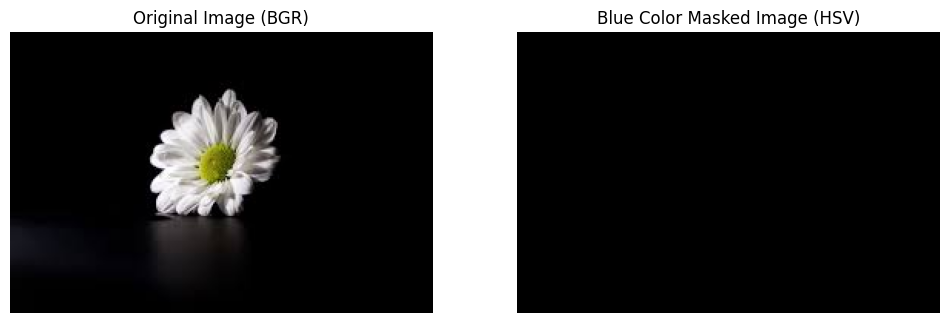

In [53]:
# Exercise 4
# HSV: color segmentation

import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load an image in BGR format
img = cv2.imread("images/flower.jfif", cv2.IMREAD_COLOR)

# Convert BGR to HSV
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Define range of blue color in HSV
lower_blue = np.array([110, 50, 50])
upper_blue = np.array([130, 255, 255])

# Threshold the HSV image to get only blue colors
mask = cv2.inRange(img_hsv, lower_blue, upper_blue)

# Bitwise-AND mask and original image
blue_masked = cv2.bitwise_and(img, img, mask=mask)

# Display original and masked images
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image (BGR)')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(blue_masked, cv2.COLOR_BGR2RGB))
plt.title('Blue Color Masked Image (HSV)')
plt.axis('off')

plt.show()


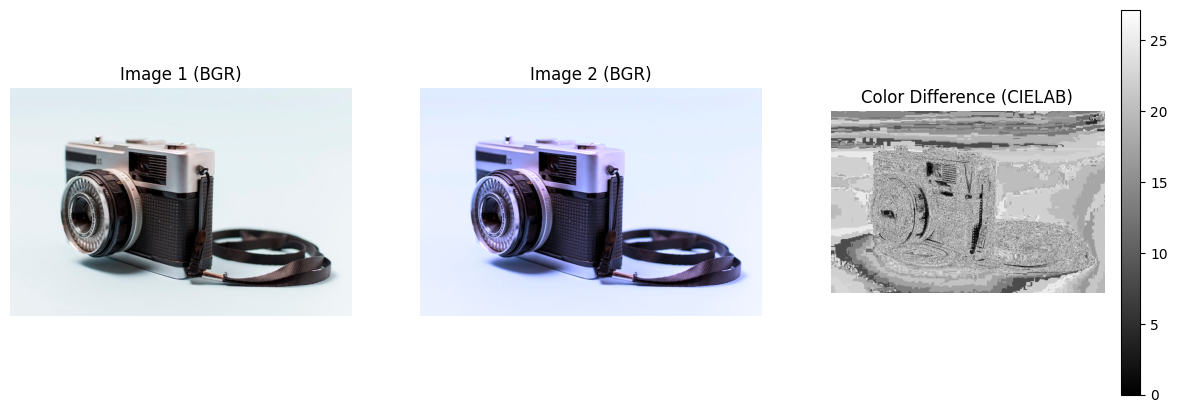

In [81]:
# Exercise 4
# CIELAB: Convert an image to CIELAB color space and perform color difference evaluation

import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load an image in BGR format
img1 = cv2.imread("images/camera.jpg", cv2.IMREAD_COLOR)
img2 = cv2.imread("images/camera.jpg", cv2.IMREAD_COLOR)

# Manipulate the color of img2
lab1 = cv2.cvtColor(img1, cv2.COLOR_BGR2LAB)
r, g, b = cv2.split(img2)
r_adjusted = np.clip(r * 1.5, 0, 255).astype(np.uint8)
img2_manipulated = cv2.merge((r_adjusted, g, b))

# Compute color difference (Euclidean distance in LAB space)
diff = np.sqrt(np.sum((lab1 - lab2)**2, axis=-1))

# Display original images and difference map
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
plt.title('Image 1 (BGR)')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(img2_manipulated, cv2.COLOR_BGR2RGB))
plt.title('Image 2 (BGR)')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(diff, cmap='gray')
plt.title('Color Difference (CIELAB)')
plt.colorbar()
plt.axis('off')

plt.show()
